In [1]:
# !pip3 install numpy==1.21.6
# !pip3 install pandas==1.3.5
# !pip3 install matplotlib==3.2.2
# !pip3 install scipy==1.4.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
# uploader = FileUpload()
# uploader

In [4]:
# file = list(uploader.value.values())[0]
# content = file['content']
# content = io.StringIO(content.decode('utf-8'))
content = "https://raw.githubusercontent.com/SalmanHabeeb/Stroke-predictor/main/dataset/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(content)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df = df.drop(columns = ['id'])

In [9]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
average_chance = df['stroke'].mean()
print(f'Average chance of stroke = {average_chance*100:.2f}%')

Average chance of stroke = 4.87%


In [11]:
def compute_confidence_interval(value, target_column, chance_column, df, level_of_significance, tails = 2, compare = None):
    if tails == 2:
        alphaby2 = 1 - (level_of_significance/2)
        if len(df[target_column]) < 30:
            z = st.t.ppf(alphaby2)
        else:
            z = st.norm.ppf(alphaby2)
        confidence_interval = (
            (df[chance_column].mean() - (z*df[chance_column].std()/np.sqrt(len(df[chance_column])))),
            (df[chance_column].mean() + (z*df[chance_column].std()/np.sqrt(len(df[chance_column])))),
            )
    else:
        alpha = 1 - level_of_significance
        if len(df[target_column]) < 30:
            z = st.t.ppf(alpha)
        else:
            z = st.norm.ppf(alpha)
        
        if compare == 'lt':
            confidence_interval = (
                -np.inf,
                (df[chance_column].mean() + (z*df[chance_column].std()/np.sqrt(len(df[chance_column])))),
             )
        else:
            confidence_interval = (
                (df[chance_column].mean() - (z*df[chance_column].std()/np.sqrt(len(df[chance_column])))),
                np.inf
             )
    if (df[df[target_column] == value][chance_column].mean() < confidence_interval[1]) & \
        (df[df[target_column] == value][chance_column].mean() > confidence_interval[0]):
        print(f'Sample mean of {chance_column} is {df[df[target_column] == value][chance_column].mean():.2f} \
and lies within confidence interval ({confidence_interval[0]:.2f},{confidence_interval[1]:.2f})')
    else:
        print(f'Sample mean of {chance_column} is {df[df[target_column] == value][chance_column].mean():.2f} \
and lies outside of confidence interval ({confidence_interval[0]:.2f},{confidence_interval[1]:.2f})')

In [12]:
def plot_chances(
    target_column,
    chance_column,
    df,
    labels = None,
    x_tick_labels = None,
    figsize  = (12, 8),
    x_label = 'X',
    y_label = 'Y',
    title = 'Title',
    title_fontweight = 'bold',
    title_fontstyle = 'italic',
    title_fontsize = 15,
    ):
    if labels is None:
        labels = list(df[target_column].unique())
    if x_tick_labels is None:
        x_tick_labels = labels
    fig, ax = plt.subplots(figsize = figsize, )
    if isinstance(labels, tuple):
        start = labels[0]
        end = labels[1]
        step = labels[2]
        start_labels = np.arange(start, end, step)
        for i in np.arange(len(start_labels)):
            plt.bar(i, df[(df[target_column] > start_labels[i]) & (df[target_column] < (start_labels[i] + step))][chance_column].mean())
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xticks(np.arange(len(start_labels)))
        x_tick_labels = [f'{i}-{i+step}' for i in start_labels]
        ax.set_xticklabels(x_tick_labels)
    else:
        for i in np.arange(len(labels)):
            plt.bar(i, df[df[target_column] == labels[i]][chance_column].mean())
        
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_xticks(np.arange(len(labels)))
        if isinstance(x_tick_labels, dict):
            x_tick_labels_list = [i for i in np.arange(len(labels))]
            for i in labels:
                x_tick_labels_list[labels.index(i)] = x_tick_labels[i]
            ax.set_xticklabels(x_tick_labels_list)
        else:
            ax.set_xticklabels(x_tick_labels)

    plt.title(title, fontweight = title_fontweight, fontstyle = title_fontstyle, fontsize = title_fontsize)
    plt.show()

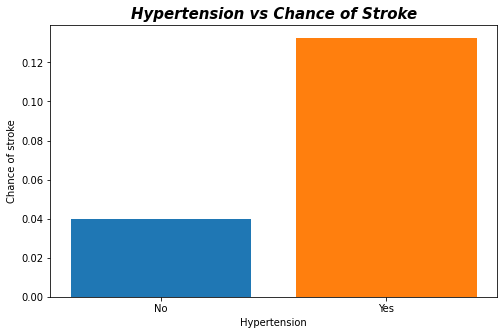

In [13]:
yesno = {
    1 : 'Yes',
    0 : 'No'
}
plot_chances('hypertension',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
x_tick_labels = ['No', 'Yes'],
x_label = 'Hypertension',
y_label = 'Chance of stroke',
title = 'Hypertension vs Chance of Stroke',
)

Null hypothesis : H0 :- Stroke chance remains average for a person with hypertension

Alternate hypothesis H1 :- Stroke chance dis above average for person with hypertension

In [14]:
compute_confidence_interval(1, 'hypertension', 'stroke', df, 0.05, 1, 'lt')

Sample mean of stroke is 0.13 and lies outside of confidence interval (-inf,0.05)


Since the stroke chance for those with hypertension is significantly above average, we reject null hypothesis.

Hence, chance of stroke is high for people with hypertension

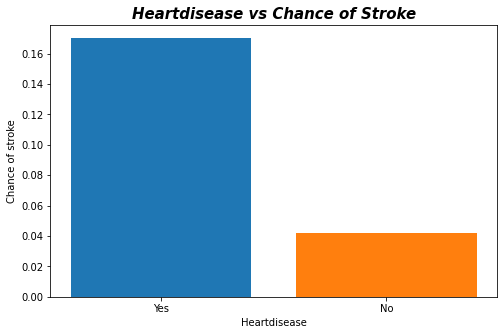

In [15]:
yesno = {
    1 : 'Yes',
    0 : 'No'
}
plot_chances('heart_disease',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
x_tick_labels = yesno,
x_label = 'Heartdisease',
y_label = 'Chance of stroke',
title = 'Heartdisease vs Chance of Stroke',
)

Null hypothesis : H0 :- Stroke chance remains average for a person with heart disease

Alternate hypothesis : H1 :- Stroke chance is greater than average for person with heart disease

In [16]:
compute_confidence_interval(1, 'heart_disease', 'stroke', df, 0.05, 1, 'lt')

Sample mean of stroke is 0.17 and lies outside of confidence interval (-inf,0.05)


Since chance of stroke for those with heart disease is significantly great, we reject the null hypothesis

Hence, chance of stroke is high for people who had heart disease

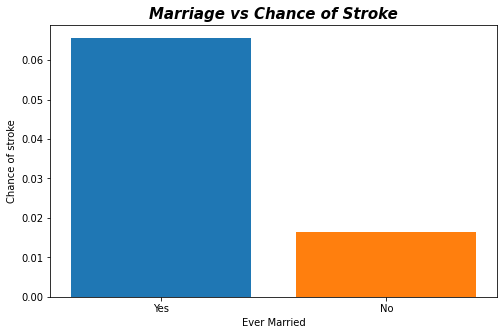

In [17]:
plot_chances('ever_married',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
x_label = 'Ever Married',
y_label = 'Chance of stroke',
title = 'Marriage vs Chance of Stroke',
)

Null hypothesis : H0 :- Stroke chance remains average for a person who has married once

Alternate hypothesis : H1 :- Stroke chance does not remain average for person who has married once

In [18]:
compute_confidence_interval('Yes', 'ever_married', 'stroke', df, 0.05)

Sample mean of stroke is 0.07 and lies outside of confidence interval (0.04,0.05)


Since chance of stroke for those who married atleast once is significantly great, we reject the null hypothesis

Hence, chance of stroke is high for people who have married once

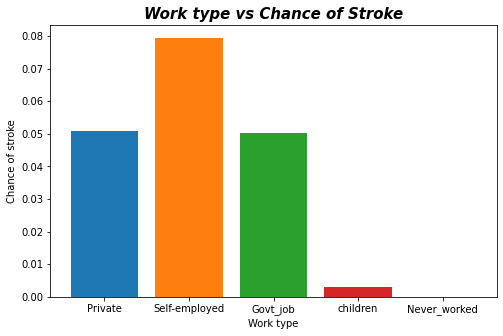

In [19]:
plot_chances('work_type',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
x_label = 'Work type',
y_label = 'Chance of stroke',
title = 'Work type vs Chance of Stroke',
)

Null hypothesis : H0 :- Stroke chance remains average for a person who is self-employed

Alternate hypothesis : H1 :- Stroke chance does not remain average for person who is self-employed

In [20]:
compute_confidence_interval('Self-employed', 'work_type', 'stroke', df, 0.05)

Sample mean of stroke is 0.08 and lies outside of confidence interval (0.04,0.05)


Since chance of stroke for those who are self-employed is significantly great, we reject the null hypothesis

Hence, chance of stroke is high for people who are self-employed


Null hypothesis : H0 :- Stroke chance remains average for a person who has private job

Alternate hypothesis : H1 :- Stroke chance does not remain average for person who has private job

In [21]:
compute_confidence_interval('Private', 'work_type', 'stroke', df, 0.05)

Sample mean of stroke is 0.05 and lies within confidence interval (0.04,0.05)


Since chance of stroke for those who have private job is within confidence interval, we accept the null hypothesis

Hence, chance of stroke is normal for people who have private job


Since chance of stroke for those with government job is same as that of those with private job, we conclude that the chance of stroke for the former is 'normal'

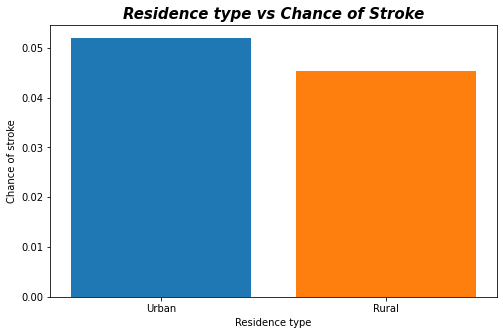

In [22]:
plot_chances('Residence_type',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
x_label = 'Residence type',
y_label = 'Chance of stroke',
title = 'Residence type vs Chance of Stroke',
)

Null hypothesis : H0 :- Stroke chance remains average for a person who is from Urban area

Alternate hypothesis : H1 :- Stroke chance is not average for person who is from Urban area

In [23]:
compute_confidence_interval('Urban', 'work_type', 'stroke', df, 0.05)

Sample mean of stroke is nan and lies outside of confidence interval (0.04,0.05)


Since chance of stroke for the person residing in urban area is within confidence interval, we accept the null hypothesis

Hence, chance of stroke is high for people from urban area

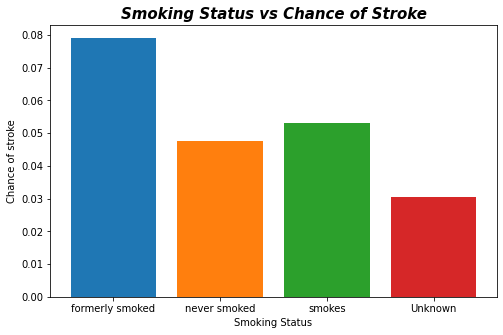

In [24]:
plot_chances('smoking_status',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
x_label = 'Smoking Status',
y_label = 'Chance of stroke',
title = 'Smoking Status vs Chance of Stroke',
)

Null hypothesis : H0 :- Stroke chance remains average for a person who has formerly smoked

Alternate hypothesis : H1 :- Stroke chance is above average for person who has formerly smoked

In [25]:
compute_confidence_interval('formerly smoked', 'smoking_status', 'stroke', df, 0.05, 1, 'lt')

Sample mean of stroke is 0.08 and lies outside of confidence interval (-inf,0.05)


Since chance of stroke for those who have formerly smoked is significantly great, we reject the null hypothesis

Hence, chance of stroke is high for people who have formerly smoked

Null hypothesis : H0 :- Stroke chance remains average for a person who are currently smoking

Alternate hypothesis : H1 :- Stroke chance is above average for person who are currently smoking

In [26]:
compute_confidence_interval('smokes', 'smoking_status', 'stroke', df, 0.05, 1, 'lt')

Sample mean of stroke is 0.05 and lies within confidence interval (-inf,0.05)


Since chance of stroke for those who are currently smoking is within confidence interval, we accept the null hypothesis

Since chance of stroke for Unknown and never smoked is less than those who are currently smoking, null hypothesis is accepted.

We conclude that for those:

(i) who never smoke, chance of stroke is average

(ii) whose smoking details are not known, chance of stroke is least.

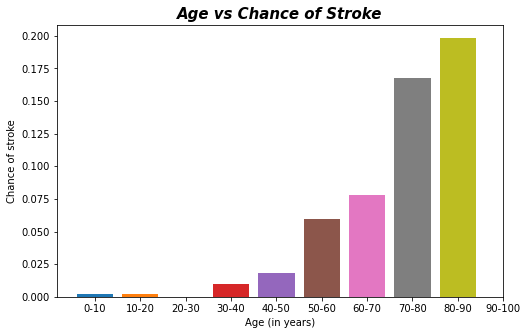

In [27]:
plot_chances('age',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
labels = (0, 100, 10),
x_label = 'Age (in years)',
y_label = 'Chance of stroke',
title = 'Age vs Chance of Stroke',
)

Since the average chance of stroke lies in (0.04, 0.05), we see that: 

(i) chance of stroke is significantly high for those above 50 years in age.

(ii)chance of stroke is significantly low for those aged below 50 years

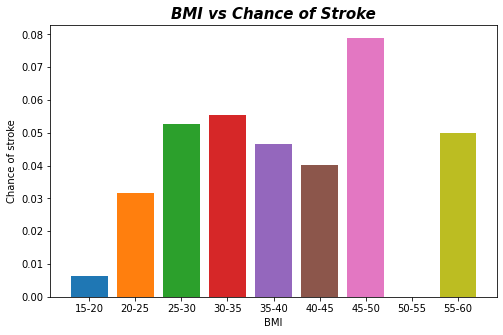

In [28]:
plot_chances('bmi',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
labels = (15, 60, 5),
x_label = 'BMI',
y_label = 'Chance of stroke',
title = 'BMI vs Chance of Stroke',
)

Since the average chance of stroke lies in (0.04, 0.05), we see that: 

(i) chance of stroke is significantly high for those above 45 years in age.

(ii)chance of stroke is significantly low for those aged below 25 years

(iii)minima at 50-60 can be explained by low amount of data for those with bmi above 50

In [29]:
print(f"Percentage of people with BMI > 50 : {(df[df['bmi'] > 50].shape[0]/df.shape[0])*100:.2f}%")
print(f"Percentage of people with 25 < BMI < 50 : {(df[(df['bmi'] > 25) & (df['bmi'] < 50)].shape[0]/df.shape[0])*100:.2f}%")
print(f"Percentage of people with BMI < 25 : {(df[df['bmi'] < 25].shape[0]/df.shape[0])*100:.2f}%")

Percentage of people with BMI > 50 : 1.55%
Percentage of people with 25 < BMI < 50 : 63.07%
Percentage of people with BMI < 25 : 30.92%


Clearly, there is low amount of data for the people whose bmi is greater than 50

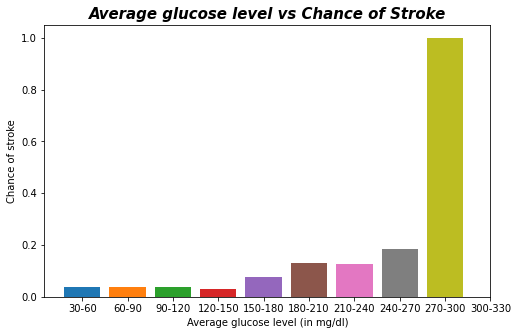

In [30]:
plot_chances('avg_glucose_level',
chance_column = 'stroke',
df = df,
figsize = (8, 5),
labels = (30, 330, 30),
x_label = 'Average glucose level (in mg/dl)',
y_label = 'Chance of stroke',
title = 'Average glucose level vs Chance of Stroke',
)

Since the average chance of stroke lies in (0.04, 0.05), we see that: 

(i) chance of stroke is significantly high for those with mean glucose levels above 270 mg/dl

(ii)chance of stroke is significantly low for those with mean glucose levels below 270 mg/dl